<a href="https://colab.research.google.com/github/MuhammadAliAhsan/Ahsan_MLProject/blob/main/Ahsan_MLAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Problem & Importing Libraries 

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Now We are going to Import the Dataset

In [290]:
dataset = pd.read_csv('https://raw.githubusercontent.com/MuhammadAliAhsan/Ahsan_MLProject/main/austin_weather.csv')

Feature Selection

In [291]:
weather = dataset[['TempHighF', 'TempAvgF']]
print(weather)


      TempHighF  TempAvgF
0            74        60
1            56        48
2            58        45
3            61        46
4            58        50
...         ...       ...
1314        103        89
1315        105        91
1316        107        92
1317        106        93
1318         99        88

[1319 rows x 2 columns]


So At this stage, we have to define the coulmns 

In [292]:
weather.columns = ['TempHighF', 'TempAvgF']


Null Values Checking

In [293]:
weather.isnull().sum()

X = weather.iloc[:, [0, 1]].values
print(X)


[[ 74  60]
 [ 56  48]
 [ 58  45]
 ...
 [107  92]
 [106  93]
 [ 99  88]]


Evaluation through K Value

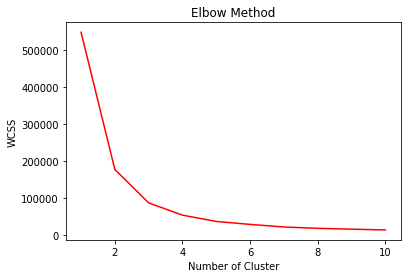

In [294]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss , color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()


KMean Model training on Dataset

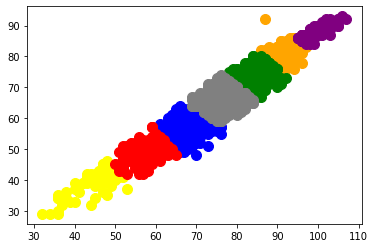

In [295]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'purple', label = 'Cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'red', label = 'Cluster 7')




Centroids Plotation 

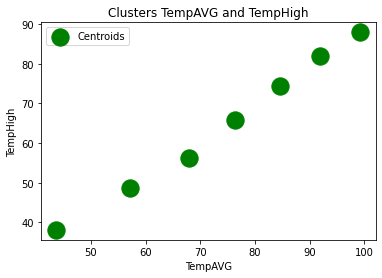

In [296]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', label = 'Centroids')
plt.title('Clusters TempAVG and TempHigh')
plt.xlabel('TempAVG')
plt.ylabel('TempHigh')
plt.legend()
plt.show()


Regression Problem/Importing Libraries 

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Dataset Importing

In [298]:
data = pd.read_csv("https://raw.githubusercontent.com/MuhammadAliAhsan/Ahsan_MLProject/main/austin_weather.csv")

data.dtypes


Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

Unique Value Printing

In [299]:
print(data['DewPointHighF'].unique())

['67' '43' '31' '36' '44' '39' '41' '49' '51' '37' '55' '54' '15' '29'
 '60' '64' '58' '28' '42' '22' '38' '45' '19' '59' '62' '40' '17' '53'
 '34' '48' '52' '61' '63' '33' '57' '65' '46' '32' '50' '27' '56' '47'
 '68' '69' '66' '70' '73' '71' '76' '72' '75' '74' '-' '77' '23' '35' '30'
 '79' '78' '80' '26' '18' '25' '13']


Hyphen Removing

In [300]:
data['DewPointHighF'] = data['DewPointHighF'].str.replace('-','')
data['DewPointAvgF'] = data['DewPointAvgF'].str.replace('-','')
data['DewPointLowF'] = data['DewPointLowF'].str.replace('-','')
data['HumidityHighPercent'] = data['HumidityHighPercent'].str.replace('-','')
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].str.replace('-','')
data['HumidityLowPercent'] = data['HumidityLowPercent'].str.replace('-','')
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].str.replace('-','')
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].str.replace('-','')
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].str.replace('-','')
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].str.replace('-','')
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].str.replace('-','')
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].str.replace('-','')
data['WindHighMPH'] = data['WindHighMPH'].str.replace('-','')
data['WindAvgMPH'] = data['WindAvgMPH'].str.replace('-','')
data['WindGustMPH'] = data['WindGustMPH'].str.replace('-','')
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].str.replace('T','')


Coulmn Data type Changing

In [301]:
data['DewPointHighF'] = pd.to_numeric(data['DewPointHighF'])
data['DewPointAvgF'] = pd.to_numeric(data['DewPointAvgF'])
data['DewPointLowF'] = pd.to_numeric(data['DewPointLowF'])
data['HumidityHighPercent'] = pd.to_numeric(data['HumidityHighPercent'])
data['HumidityAvgPercent'] = pd.to_numeric(data['HumidityAvgPercent'])
data['HumidityLowPercent'] = pd.to_numeric(data['HumidityLowPercent'])
data['SeaLevelPressureHighInches'] = pd.to_numeric(data['SeaLevelPressureHighInches'])
data['SeaLevelPressureAvgInches'] = pd.to_numeric(data['SeaLevelPressureAvgInches'])
data['SeaLevelPressureLowInches'] = pd.to_numeric(data['SeaLevelPressureLowInches'])
data['VisibilityHighMiles'] = pd.to_numeric(data['VisibilityHighMiles'])
data['VisibilityAvgMiles'] = pd.to_numeric(data['VisibilityAvgMiles'])
data['VisibilityLowMiles'] = pd.to_numeric(data['VisibilityLowMiles'])
data['WindHighMPH'] = pd.to_numeric(data['WindHighMPH'])
data['WindAvgMPH'] = pd.to_numeric(data['WindAvgMPH'])
data['WindGustMPH'] = pd.to_numeric(data['WindGustMPH'])
data['PrecipitationSumInches'] = pd.to_numeric(data['PrecipitationSumInches'])



Null Value Checking

In [302]:
data.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

Droping Null Values

In [303]:
data.dropna(inplace=True)

Null Value Rechecking

In [304]:
data.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

Data Describing 

In [305]:
data.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,80.952663,70.528318,59.601014,61.310228,56.384615,50.678783,87.739645,66.272189,44.295858,30.111412,30.022096,29.931175,9.990702,9.139476,6.808115,13.191040,4.975486,21.300085,0.127380
std,14.841901,14.142399,14.343669,13.719980,14.984651,16.281365,11.193643,12.744009,17.279440,0.180415,0.172844,0.172662,0.171826,1.477979,3.756263,3.436249,2.069088,5.878959,0.450287
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,72.000000,61.000000,49.000000,52.000000,46.000000,38.000000,84.000000,59.000000,31.000000,29.990000,29.910000,29.820000,10.000000,9.000000,2.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,62.000000,66.000000,61.000000,55.000000,90.000000,66.000000,42.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,93.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,54.000000,30.210000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


Separation of Features as Date,Month,Year

In [306]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

data.drop(columns='Date',inplace=True)



Plot Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH,PrecipitationSumInches,Events,Year,Month
0,60,49.0,75.0,29.68,7.0,4.0,0.46,"Rain , Thunderstorm",2013,12
1,48,36.0,68.0,30.13,10.0,6.0,0.00,,2013,12
2,45,27.0,52.0,30.49,10.0,3.0,0.00,,2013,12
3,46,28.0,56.0,30.45,10.0,4.0,0.00,,2013,12
5,48,36.0,63.0,30.40,9.0,3.0,0.00,,2013,12
...,...,...,...,...,...,...,...,...,...,...
1314,89,67.0,54.0,29.97,10.0,5.0,0.00,,2017,7
1315,91,64.0,54.0,29.90,10.0,5.0,0.00,,2017,7
1316,92,64.0,51.0,29.86,10.0,4.0,0.00,,2017,7
1317,93,68.0,48.0,29.91,10.0,4.0,0.00,,2017,7


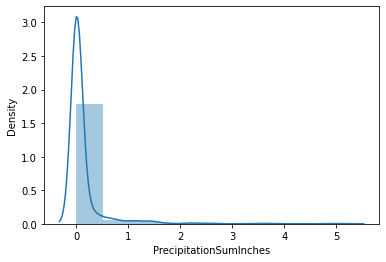

In [307]:
sns.distplot(data['PrecipitationSumInches'],bins=10)

data[['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH','PrecipitationSumInches','Events','Year','Month']]


Extra Feature Removal/Selecting Features 

In [308]:
x = data.drop(columns=['PrecipitationSumInches','Events','Year'])

Predicted Dependent Feature & X Plotting 

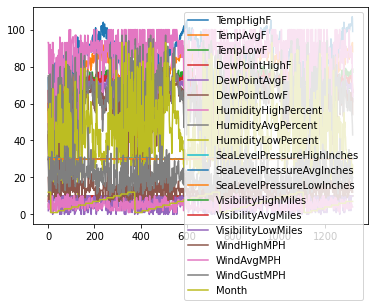

In [309]:
y = data['PrecipitationSumInches']
x.plot()

Plot Distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


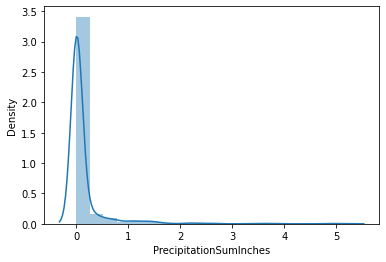

In [310]:
sns.distplot(y,bins = 20, kde = True)


Printing Corealtion

In [311]:
correlation = x.corr()
print(correlation)


                            TempHighF  TempAvgF  ...  WindGustMPH     Month
TempHighF                    1.000000  0.970712  ...     0.031588  0.212102
TempAvgF                     0.970712  1.000000  ...     0.026634  0.247494
TempLowF                     0.881366  0.968721  ...     0.020634  0.269413
DewPointHighF                0.805128  0.878536  ...     0.108611  0.261846
DewPointAvgF                 0.801641  0.892328  ...     0.039523  0.274662
DewPointLowF                 0.759948  0.861853  ...    -0.032889  0.273711
HumidityHighPercent          0.124567  0.203647  ...    -0.006808  0.136295
HumidityAvgPercent          -0.120606  0.025413  ...     0.004194  0.119639
HumidityLowPercent          -0.257929 -0.094412  ...     0.010260  0.088448
SeaLevelPressureHighInches  -0.674988 -0.692963  ...    -0.166940 -0.079990
SeaLevelPressureAvgInches   -0.612021 -0.620318  ...    -0.259220 -0.039515
SeaLevelPressureLowInches   -0.533515 -0.535976  ...    -0.342933  0.010560
VisibilityHi

Corealtion plotting

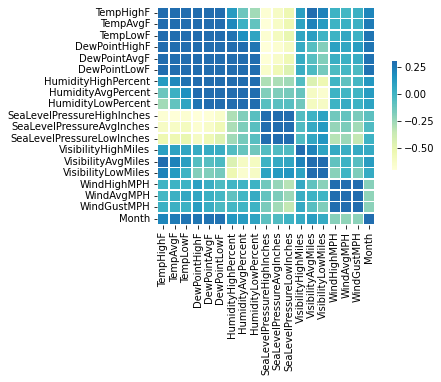

In [312]:
sns.heatmap(x.corr(),  cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()



For Normalizing Data/ Standard Scale

In [313]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)


Dataset Splitting 

In [314]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2,random_state=42)


Regression Analysis 

In [315]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)


LinearRegression()

Dependent Variable Prediction

In [316]:
y_predicted = reg_model.predict(x_test)

Result Evaluation

In [317]:
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
perc = r2_score(y_test, y_predicted)
print("R2 Linear Regression Score :{:.1%}".format(perc))



Mean absolute error = 0.18399138713597485
Mean squared error = 0.10947044385464896
R2 score = 0.42453712249385156
R2 Linear Regression Score :42.5%


Classification problem/Libraries Importing

In [318]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


Dataset Importing

In [319]:
data = pd.read_csv('https://raw.githubusercontent.com/MuhammadAliAhsan/Ahsan_MLProject/main/austin_weather.csv', parse_dates=['Date'])


Dataset Description 

In [320]:
data.describe()


,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


Dataset Information 

In [321]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1319 non-null   datetime64[ns]
 1   TempHighF                   1319 non-null   int64         
 2   TempAvgF                    1319 non-null   int64         
 3   TempLowF                    1319 non-null   int64         
 4   DewPointHighF               1319 non-null   object        
 5   DewPointAvgF                1319 non-null   object        
 6   DewPointLowF                1319 non-null   object        
 7   HumidityHighPercent         1319 non-null   object        
 8   HumidityAvgPercent          1319 non-null   object        
 9   HumidityLowPercent          1319 non-null   object        
 10  SeaLevelPressureHighInches  1319 non-null   object        
 11  SeaLevelPressureAvgInches   1319 non-null   object      

Selecting Features for Corelation checking

In [322]:
weather = data[['SeaLevelPressureAvgInches', 'DewPointAvgF', 'TempAvgF', 'HumidityAvgPercent']]
print(weather)


     SeaLevelPressureAvgInches DewPointAvgF  TempAvgF HumidityAvgPercent
0                        29.68           49        60                 75
1                        30.13           36        48                 68
2                        30.49           27        45                 52
3                        30.45           28        46                 56
4                        30.33           40        50                 71
...                        ...          ...       ...                ...
1314                     29.97           67        89                 54
1315                      29.9           64        91                 54
1316                     29.86           64        92                 51
1317                     29.91           68        93                 48
1318                     29.97           61        88                 43

[1319 rows x 4 columns]


Corelation Matrix

In [323]:
correlation = weather.corr()
print(correlation)


          TempAvgF
TempAvgF       1.0


Corelation Matrix Plotation

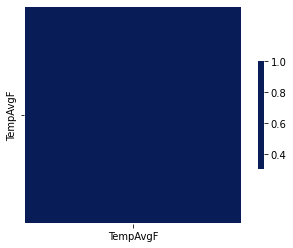

In [324]:
sns.heatmap(weather.corr(),  cmap="YlGnBu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


Dependent Variable which should be predicted

In [325]:
condition = data['Events'].str.contains(' ')

Independent Variable 

In [326]:
to_be_kept = ['Date','TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'Events']


Excluding Clear Weather 

In [327]:
polished_data = data[condition == False]


Keeping Choosen Column

In [328]:
polished_data = polished_data.loc[:, polished_data.columns.intersection(to_be_kept)]
X = polished_data[set(list(polished_data.columns))-set(['Events', 'Date'])]
y = polished_data['Events']



X Plotting

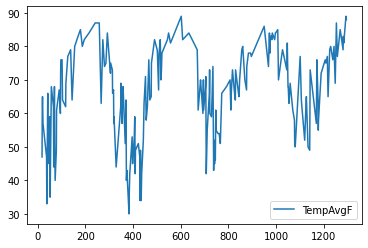

In [329]:
X.plot()


This function generates n = len(max_depths) decision trees. Each of depth max_depths[i]
Fits on x_train, y_train, predicts on x_test
Returns classifiers and predictions


In [330]:
def many_decision_trees(max_depths, criterion, x_train, y_train, x_test, y_test):
    clf_array = []
    predictions_array = []
    
    for depth in max_depths:
        clf = tree.DecisionTreeClassifier(max_depth=depth, criterion=criterion)
        clf = clf.fit(x_train, y_train) 
        prediction = clf.predict(x_test)
        
        print('Tree depth: {} Accuracy: {}'.format(depth, accuracy_score(y_test, prediction)))
        
        clf_array.append(clf)
        predictions_array.append(prediction)
    return clf_array, predictions_array


Dataset Splitting 

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Defining Depth range

In [332]:
depths = list(range(3, 8))


Lets try the decision tree, first predicting on training data
Evalauating the prediction regarding tree on the training dataset


In [333]:
print('Prediction on training data -------------------------')
clfs_tr, predictions_tr = many_decision_trees(depths, 'entropy', X_train, y_train, X_train, y_train) 


Prediction on training data -------------------------
Tree depth: 3 Accuracy: 0.8961038961038961
Tree depth: 4 Accuracy: 0.9025974025974026
Tree depth: 5 Accuracy: 0.9090909090909091
Tree depth: 6 Accuracy: 0.935064935064935
Tree depth: 7 Accuracy: 0.961038961038961


Prediction on testing datasets

In [334]:
print('\nPrediction on test data -----------------------------')
clfs_te, predictions_te = many_decision_trees(depths, 'entropy', X_train, y_train, X_test, y_test)




Prediction on test data -----------------------------
Tree depth: 3 Accuracy: 0.8157894736842105
Tree depth: 4 Accuracy: 0.8157894736842105
Tree depth: 5 Accuracy: 0.8157894736842105
Tree depth: 6 Accuracy: 0.7894736842105263
Tree depth: 7 Accuracy: 0.7894736842105263


Founding Class

In [335]:
print('Classes: {}'.format(clfs_te[0].classes_))
print('Features: {}'.format(list(X)))


Classes: ['Fog' 'Rain' 'Thunderstorm']
Features: ['TempAvgF', 'HumidityAvgPercent', 'DewPointAvgF', 'SeaLevelPressureAvgInches']


Decision Tree Graph Plotation

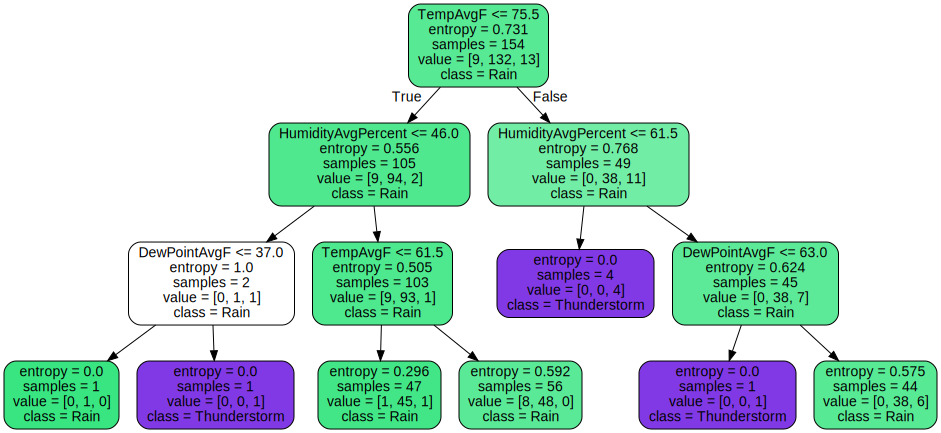

In [336]:
dot_data = tree.export_graphviz(clfs_te[0], out_file=None, rounded=True, class_names=clfs_te[0].classes_, 
                                feature_names=list(X), filled=True)
graph = graphviz.Source(dot_data) 
graph
